# Data Cleaning with Pandas
### Property Data
- Sources of Missing Values
- Standard Missing Values
- Summarizing Missing Values
- Analyzing Obesity in England
- Time Series
- Basic Time Series Manipulation
- Time Series on Dataset

### Property Data
- Type of data
- Data range
- Data distribution
- Data quality
- Data dimensinalty
- Data sparsity
- Data scale

### Dapat membantu
- memilih teknis analisis yang paling tepat
- memaksimalkan hasil analisis yang dihasilkan
- dapat mengidentifikasi masalah yang mungkin terjadi
- meningkatkan kualitas data

## Source Missing Values

In [1]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"

In [2]:
import requests 

def downloadDataSet(url,destNameFile): 
    """
    Download Data Set
    """
    response = requests.get(url)
    if response.status_code == 200: 
        with open(destNameFile, 'wb') as f:
            f.write(response.content)
        
        ##response.close()
        return True 
    
    response.close()
    print("Request Error , http statuscode : ",response.status_code)
    return False 

In [3]:
namaFile = "property_data.csv"
print(downloadDataSet(url,namaFile))

True


In [4]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv(namaFile)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### Catatan
- ST_NUM : Street Num
- ST_NAME : Street Name
- OWN_OCCUPIED : Pemilik nya menempati
- NUM_BEDROOM : jumlah bedroom
- NUM_BAT = jumlah bathrooms
- SQT_FT = square foot

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [7]:
import pandas as pd 
dfa = pd.DataFrame([ [2,3,1], [3,2,2], [2,4,4] ], columns=list("ABC"))
print(dfa)

   A  B  C
0  2  3  1
1  3  2  2
2  2  4  4


In [8]:
df.apply?

In [9]:
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [10]:
#dfa.apply(lambda x: x[0], axis=0) # 1 = kolom , 0 = index 
dfa.apply(lambda x: x['A'], axis=1) # 1 = kolom , 0 = index 

0    2
1    3
2    2
dtype: int64

In [11]:
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [12]:
# iloc 
# dfa.iloc[0]
dfa.iloc[0:1,:]
# loc 

,A,B,C
0,2,3,1


In [13]:
# loc 
dfa.loc[0:1]

,A,B,C
0,2,3,1
1,3,2,2


In [14]:
dfa.iloc[0]

A    2
B    3
C    1
Name: 0, dtype: int64

In [15]:
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [16]:
dfa.style.apply( lambda x: ["background: red" if v>= x.iloc[0] else "" for v in x], axis =0)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [18]:
dfa.style.apply(lambda x: [print(f" Kondisi True v={v} >= x.iloc[0]={x.iloc[0]} ") if v>= x.iloc[0] else "" for v in x], axis=0)

 Kondisi True v=2 >= x.iloc[0]=2 
 Kondisi True v=3 >= x.iloc[0]=2 
 Kondisi True v=2 >= x.iloc[0]=2 
 Kondisi True v=3 >= x.iloc[0]=3 
 Kondisi True v=4 >= x.iloc[0]=3 
 Kondisi True v=1 >= x.iloc[0]=1 
 Kondisi True v=2 >= x.iloc[0]=1 
 Kondisi True v=4 >= x.iloc[0]=1 


,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [19]:
dfa.apply(np.sqrt)

,A,B,C
0,1.414214,1.732051,1.000000
1,1.732051,1.414214,1.414214
2,1.414214,2.000000,2.000000


In [20]:
dfa.apply(np.sum, axis=1)

0     6
1     7
2    10
dtype: int64

## Standard Missing Values

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [22]:
street_num = df.loc[:,['ST_NUM']]
street_num

,ST_NUM
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [23]:
import math 
def highlight_column_nan(column):    
    """
    Function untuk me return background-color
    """
    highlight = 'background-color: blue;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if math.isnan(v)  else default for v in column]

In [24]:
df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0 )

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3,1,1000
1,100002000.000000,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.000000,nan,LEXINGTON,N,nan,1,850
3,100004000.000000,201.000000,BERKELEY,12,1,nan,700
4,nan,203.000000,BERKELEY,Y,3,2,1600
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800
6,100007000.000000,nan,WASHINGTON,nan,2,HURLEY,950
7,100008000.000000,213.000000,TREMONT,Y,--,1,nan
8,100009000.000000,215.000000,TREMONT,Y,na,2,1800


In [25]:
df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


In [26]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [27]:
df['ST_NUM'].isna() # isnull 

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non Standard Missing Values

In [28]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [29]:
str(1e400*0)

'nan'

In [30]:
import math 
missing_values = ["n/a","na","--"]

def highlight_column_missing_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if str(v) == str(1e400*0) or v in missing_values else default for v in column]

In [31]:
df.style.apply(highlight_column_missing_values, subset=['NUM_BEDROOMS'], axis=0 )

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3,1,1000
1,100002000.000000,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.000000,nan,LEXINGTON,N,nan,1,850
3,100004000.000000,201.000000,BERKELEY,12,1,nan,700
4,nan,203.000000,BERKELEY,Y,3,2,1600
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800
6,100007000.000000,nan,WASHINGTON,nan,2,HURLEY,950
7,100008000.000000,213.000000,TREMONT,Y,--,1,nan
8,100009000.000000,215.000000,TREMONT,Y,na,2,1800


In [32]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [33]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [34]:
missing_values = ["n/a","na","--"]
df = pd.read_csv(namaFile, na_values=missing_values)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [35]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## Unexpected Missing Values

In [37]:
values_real = ["Y","y","N","n"]

def highlight_column_creteria_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [default if v in values_real else highlight for v in column]

In [38]:
df.style.apply(highlight_column_creteria_values, subset=['OWN_OCCUPIED'], axis=0 )

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3.000000,1,1000.000000
1,100002000.000000,197.000000,LEXINGTON,N,3.000000,1.5,nan
2,100003000.000000,nan,LEXINGTON,N,nan,1,850.000000
3,100004000.000000,201.000000,BERKELEY,12,1.000000,nan,700.000000
4,nan,203.000000,BERKELEY,Y,3.000000,2,1600.000000
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800.000000
6,100007000.000000,nan,WASHINGTON,nan,2.000000,HURLEY,950.000000
7,100008000.000000,213.000000,TREMONT,Y,nan,1,nan
8,100009000.000000,215.000000,TREMONT,Y,nan,2,1800.000000


In [39]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [40]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [41]:
# melakukan pengecekan ada data numeric
x = "y" 
try :
    int(x)
except ValueError: 
    print("Value ini bukan int ")

Value ini bukan int 


In [42]:
idx = 0 
for row in df['OWN_OCCUPIED']:
    try :
        int(row)
        df.loc[idx,'OWN_OCCUPIED'] = np.nan
    except ValueError: 
        pass 
    idx +=1

In [43]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Summarizing Missing Values

In [44]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [45]:
df.isnull().sum().sum()

12

In [46]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [47]:
df['ST_NUM'].fillna(120, inplace=True)

In [48]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,120.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,120.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [49]:
# median dari bedroom
num_bedroom_median = df['NUM_BEDROOMS'].median()
num_bedroom_median

3.0

In [50]:
df['NUM_BEDROOMS'].fillna(num_bedroom_median, inplace=True)

In [51]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,120.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,120.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Use case Tumpahan oli
https://github.com/jbrownlee/Datasets/blob/master/oil-spill.csv

In [52]:
# latihan untuk melihat number yang uniq
dfz = pd.DataFrame({"A":[14,4,5,4,1], 
                    "B":[5,2,54,3,2],
                    "C":[20,20,7,3,8],
                    "D":[14,3,6,2,6]  })
dfz

,A,B,C,D
0,14,5,20,14
1,4,2,20,3
2,5,54,7,6
3,4,3,3,2
4,1,2,8,6


In [53]:
dfz.nunique(axis=1)

0    3
1    4
2    4
3    3
4    4
dtype: int64

In [54]:
dfz.nunique(axis=0)

A    4
B    4
C    4
D    4
dtype: int64

In [55]:
urloli  = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"

In [56]:
from numpy import loadtxt 
from numpy import unique 

data = loadtxt(urloli,delimiter=',')
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(937, 50)


In [57]:
for i in range(data.shape[1]): 
    print(i, len(unique(data[:,i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [58]:
from pandas import read_csv 
dfoli = read_csv(urloli, header=None)
dfunik = dfoli.nunique()
print(dfunik)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [59]:
dfoli.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [60]:
index_to_del = [i  for i, v in enumerate (dfunik) if v == 1]
print(index_to_del)

[22]


In [61]:
print(dfoli.shape)
dfoli.drop(index_to_del, axis=1, inplace=True)
print(dfoli.shape)

(937, 50)
(937, 49)


In [62]:
dfunik2 = dfoli.nunique()

In [63]:
for i, v in enumerate (dfunik2):
    persen = float(v)/dfunik2[0]*100
    if persen <= 2:
        print(f"Kurang dari satu persen i={i}, num={v}, pesen={persen}")

Kurang dari satu persen i=31, num=4, pesen=1.680672268907563
Kurang dari satu persen i=35, num=3, pesen=1.2605042016806722
Kurang dari satu persen i=44, num=2, pesen=0.8403361344537815
Kurang dari satu persen i=48, num=2, pesen=0.8403361344537815


In [64]:
dfunik

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [65]:
# for i in range(dfoli.shape[1]):
#     num = len(unique(dfoli[:, i]))
#     persen = num / dfoli.shape[0] * 100
#     if persen < 1:
#         print(f"Kurang dari satu persen i={i}, num={num}, pesen={persen}")

In [66]:
pip install xlrd 

## Analizing Obesity England

In [77]:
import pandas as pd

In [78]:
%matplotlib inline

In [86]:
data = pd.ExcelFile('data/obes.xls')

In [87]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [88]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [89]:
data_age.head(10)

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [90]:
data_age.tail()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
11,2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


In [91]:
data_age.rename(columns={u'Unnamed: 0':u'Year'}, inplace=True )

In [92]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [93]:
data_age.dropna(inplace=True)

In [94]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [95]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [96]:
print(data_age.shape)
data_age.index

(11, 10)


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [97]:
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [98]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

<AxesSubplot:xlabel='Year'>

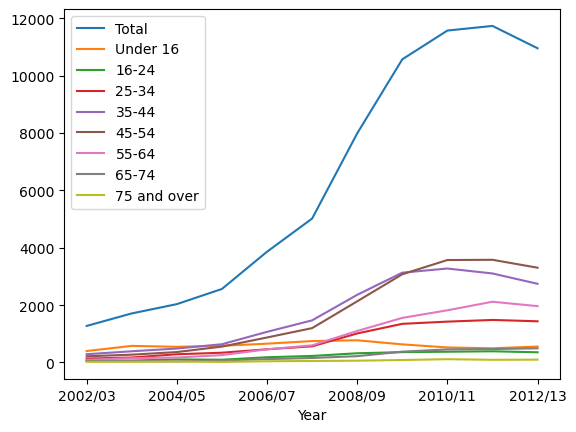

In [99]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

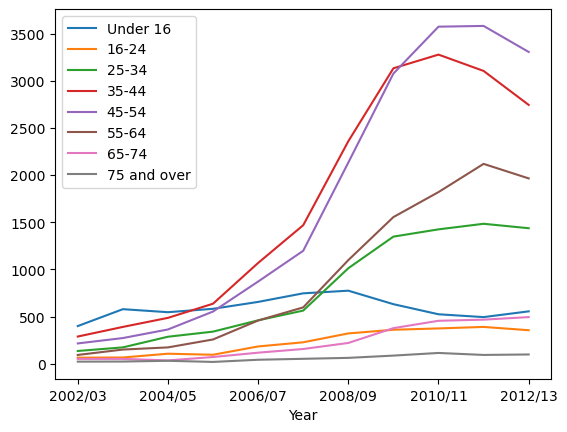

In [100]:
drop_total = data_age.drop('Total',axis=1)
drop_total.plot()

<AxesSubplot:xlabel='Year'>

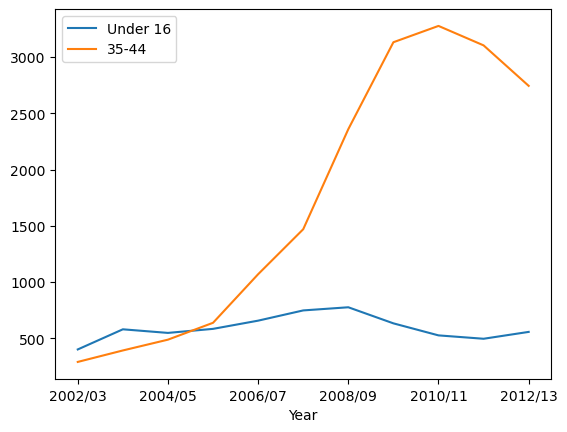

In [101]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

## Basic Time Series Manipulation

In [102]:
from datetime import datetime

In [103]:
date_range = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_range 

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [104]:
df = pd.DataFrame(date_range, columns=['date'])
df 

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [105]:
df['data'] = np.random.randint(0,100, size=(len(date_range)))

In [106]:
df

,date,data
0,2020-01-01 00:00:00,20
1,2020-01-01 01:00:00,13
2,2020-01-01 02:00:00,5
3,2020-01-01 03:00:00,56
4,2020-01-01 04:00:00,56
...,...,...
164,2020-01-07 20:00:00,81
165,2020-01-07 21:00:00,24
166,2020-01-07 22:00:00,2
167,2020-01-07 23:00:00,87


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [108]:
data_age.set_index('Year', inplace=True)
data_age

KeyError: "None of ['Year'] are in the columns"

In [109]:
df["datetime"]= pd.to_datetime(df['date'])
df

,date,data,datetime
0,2020-01-01 00:00:00,20,2020-01-01 00:00:00
1,2020-01-01 01:00:00,13,2020-01-01 01:00:00
2,2020-01-01 02:00:00,5,2020-01-01 02:00:00
3,2020-01-01 03:00:00,56,2020-01-01 03:00:00
4,2020-01-01 04:00:00,56,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,81,2020-01-07 20:00:00
165,2020-01-07 21:00:00,24,2020-01-07 21:00:00
166,2020-01-07 22:00:00,2,2020-01-07 22:00:00
167,2020-01-07 23:00:00,87,2020-01-07 23:00:00


In [110]:
df = df.set_index('datetime') #df 

In [111]:
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,20
2020-01-01 01:00:00,2020-01-01 01:00:00,13
2020-01-01 02:00:00,2020-01-01 02:00:00,5
2020-01-01 03:00:00,2020-01-01 03:00:00,56
2020-01-01 04:00:00,2020-01-01 04:00:00,56
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,81
2020-01-07 21:00:00,2020-01-07 21:00:00,24
2020-01-07 22:00:00,2020-01-07 22:00:00,2


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2020-01-01 00:00:00 to 2020-01-08 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.3 KB


In [113]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=169, freq=None)

In [114]:
df.drop(['date'],axis=1, inplace=True)
df

,data
datetime,
2020-01-01 00:00:00,20
2020-01-01 01:00:00,13
2020-01-01 02:00:00,5
2020-01-01 03:00:00,56
2020-01-01 04:00:00,56
...,...
2020-01-07 20:00:00,81
2020-01-07 21:00:00,24
2020-01-07 22:00:00,2


## use case sumber energi jerman

In [115]:
urlgerman  = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv"

In [116]:
opsd_daily = pd.read_csv(urlgerman)
opsd_daily.shape

(4383, 5)

In [117]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [118]:
opsd_daily.index

RangeIndex(start=0, stop=4383, step=1)

In [119]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [120]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [121]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [122]:
opsd_dailynew = pd.read_csv(urlgerman, index_col=0,parse_dates=True)
opsd_dailynew.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [123]:
opsd_dailynew.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [124]:
opsd_dailynew['Year'] = opsd_dailynew.index.year 
opsd_dailynew['Month'] = opsd_dailynew.index.month 
opsd_dailynew['Weekday'] = opsd_dailynew.index.weekday 

In [125]:
opsd_dailynew

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [126]:
opsd_dailynew.loc['2017-12-29']

Consumption    1295.08753
Wind            584.27700
Solar            29.85400
Wind+Solar      614.13100
Year           2017.00000
Month            12.00000
Weekday           4.00000
Name: 2017-12-29 00:00:00, dtype: float64

In [127]:
opsd_dailynew.loc['2014-12-31':'2015-01-01']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-12-31,1183.510,145.511,3.721,149.232,2014,12,2
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,3


In [128]:
opsd_dailynew.loc['2014-12-24':'2014-12-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-12-24,1154.524,527.182,18.589,545.771,2014,12,2
2014-12-25,1089.457,400.728,16.820,417.548,2014,12,3


In [129]:
opsd_dailynew.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot:xlabel='Date'>

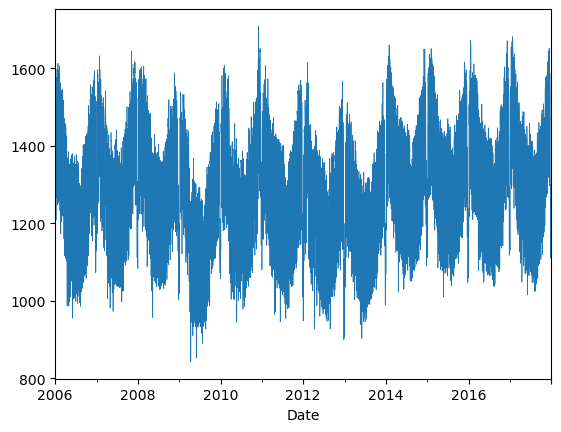

In [130]:
opsd_dailynew['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

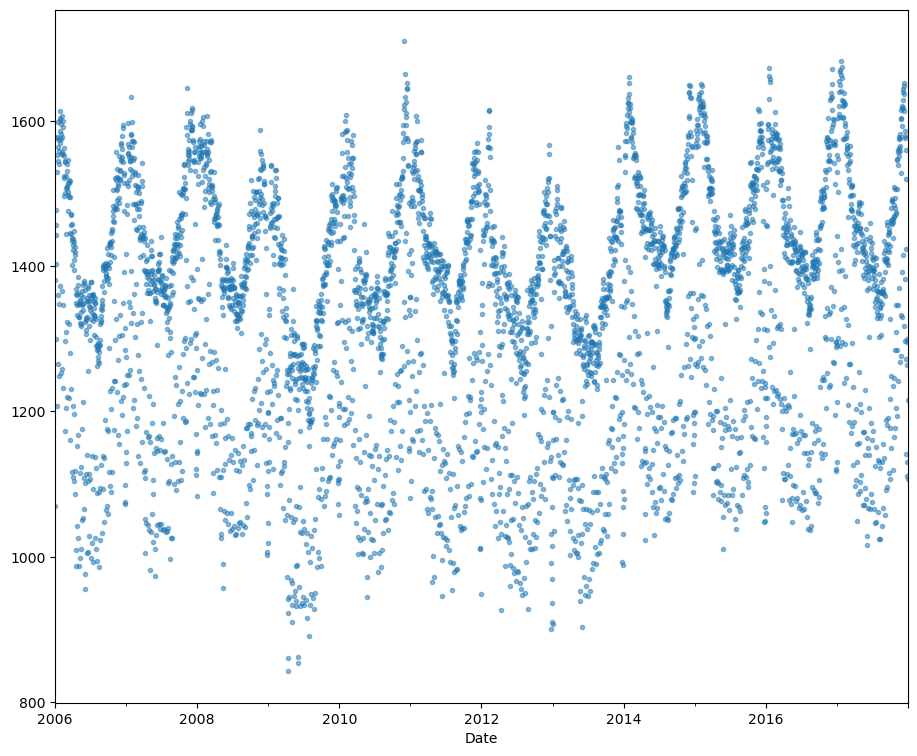

In [131]:
opsd_dailynew['Consumption'].plot( marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

Text(0, 0.5, 'Daily Consumption')

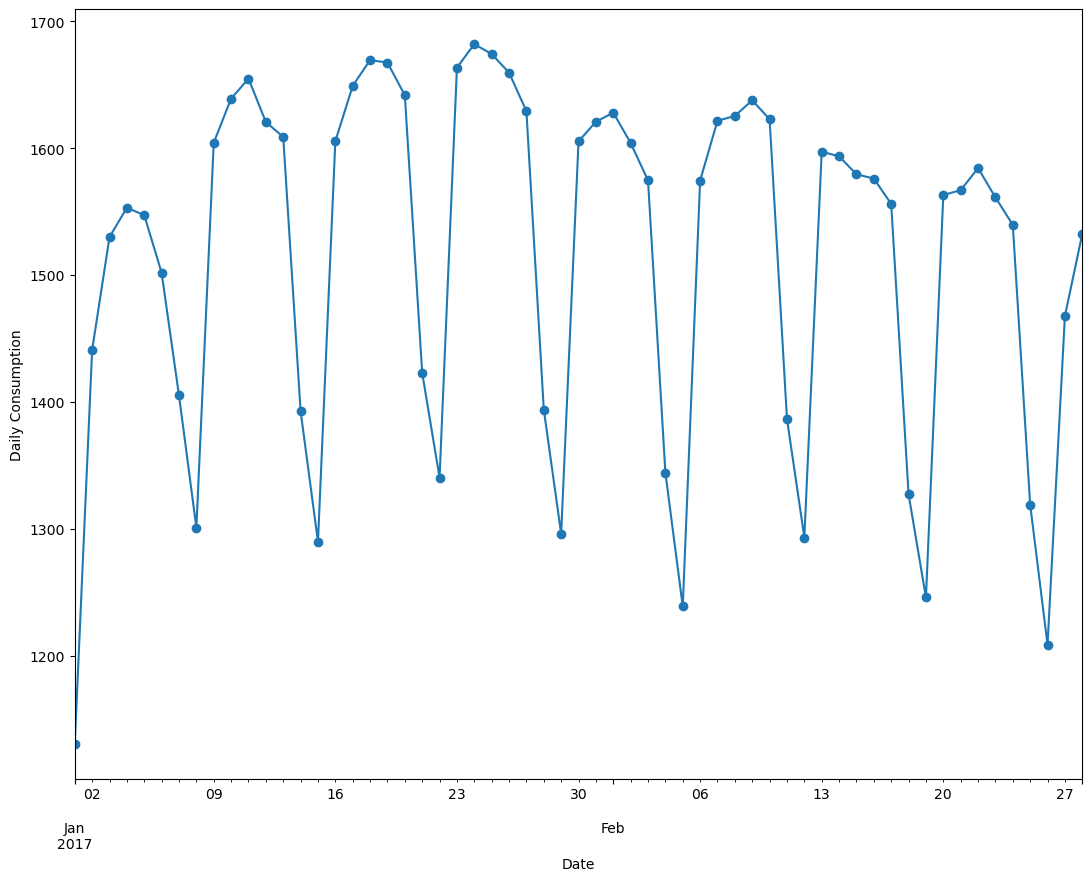

In [132]:
ax = opsd_dailynew.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',linestyle='-',figsize=(13,10))
ax.set_ylabel('Daily Consumption')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

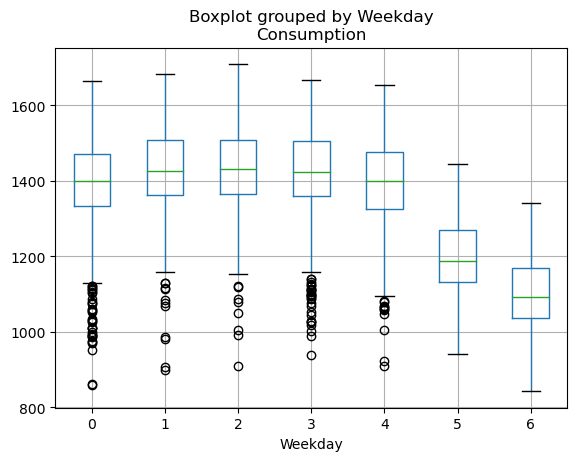

In [133]:
opsd_dailynew.boxplot(column=['Consumption'], by='Weekday')

In [134]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']

mean_weekly = opsd_dailynew[data_columns].resample('W').mean()
mean_weekly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

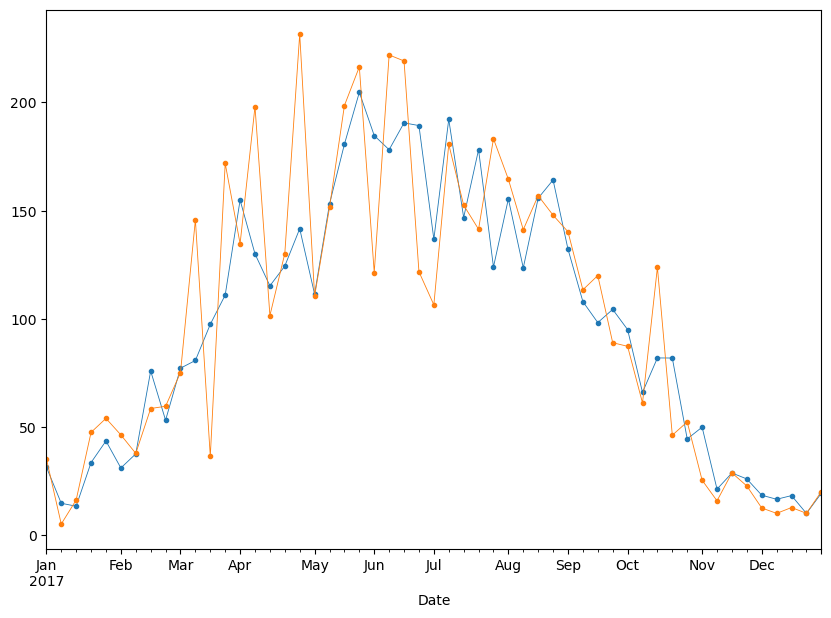

In [135]:
start , end = '2017-01' , '2018-01'
mean_weekly.loc[start:end, 'Solar'].plot(marker='.',linestyle='-',linewidth=0.6,figsize=(10,7))
opsd_dailynew.loc[start:end, 'Solar'].plot(marker='.',linestyle='-',linewidth=0.6,figsize=(10,7))

## Creating Web App with Flask

In [136]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask  
app = Flask(__name__) 

## 2
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Mar/2023 22:39:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Mar/2023 22:39:52] "GET /favicon.ico HTTP/1.1" 404 -


### Apa yang dilakukan kode tersebut?

- Pertama mengimport kelas Flask. Instance dari kelas ini adalah aplikasi WSGI kita
- Selanjutnya membuat instance dari kelas ini. Argumen pertama adalah nama modul atau paket aplikasi. Jika menggunakan satu modul (seperti dalam contoh ini), maka harus menggunakan name karena bergantung pada apakah aplikasi tersebut dimulai sebagai aplikasi atau diimpor sebagai modul. Namanya akan berbeda ('main' versus nama impor sebenarnya). Ini diperlukan agar Flask tahu dimana mencari templates, static files, dan lain-lain
- Kita kemudian menggunakan dekorator route() untuk memberi tahu Flask, URL apa yang harus mentrigger fungsi kita
- Fungsi tersebut diberi nama yang juga digunakan untuk menghasilkan URL untuk fungsi itu, dan mengembalikan pesan yang ingin kita tampilkan di browser pengguna

Simpan sebagai hello.py atau yang serupa. Pastikan untuk tidak memanggil aplikasi kita flask.py karena ini akan conflict dengan Flask itu sendiri.
Untuk dapat menjalankan aplikasi, kita dapat menggunakan perintah flask atau switch -m python dengan Flask. Sebelum kita dapat melakukannya, kita perlu memberi tahu terminal tentang aplikasi yang akan digunakan dengan mengekspor FLASK_APP environment variable:

$ export FLASK_APP=hello.py

$ flask run

Running on http://127.0.0.1:5000/
Command tersebut meluncurkan server bawaan yang sangat sederhana yang cukup baik untuk testing, tetapi mungkin bukan yang akan digunakan dalam production.

Sekarang akses ke http://127.0.0.1:5000/ dan kita akan melihat hello world.

In [ ]:
# Belum detail bagian Flask